<a href="https://colab.research.google.com/github/SowmyaMadala/ML-Projects/blob/main/commentaryclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Import Required Packages**

In [ ]:
#importing all the required packages
import pandas as pd 
import numpy as np  
from pandas import Series,DataFrame
from sklearn.model_selection import train_test_split   
import matplotlib.pyplot as plt     
from nltk.tokenize import word_tokenize   
from nltk.corpus import stopwords        
from nltk.stem import PorterStemmer       
from nltk.stem import WordNetLemmatizer
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
import sys
import nltk
import sklearn

In [ ]:
#download the packages
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Reading The Input Files**

In [ ]:
#Reading Training file
train_path="/content/drive/My Drive/cs3/CCC_TrainingData.xlsx"
cric=pd.read_excel(train_path)
train_df=pd.DataFrame(cric)
print(train_df.head())
#reading Test file
test_path="/content/drive/My Drive/cs3/CCC_TestData.xlsx"
crictest=pd.read_excel(test_path)
test_df=pd.DataFrame(crictest)
print(test_df.head())


   ID      Match_ID  ...  Over_Run_Total          Target
0   0  803965640511  ...               4  Run_Bw_Wickets
1   1  803965640511  ...               4  Run_Bw_Wickets
2   2  803965640511  ...               4  Run_Bw_Wickets
3   3  803965640511  ...               4             Dot
4   4  803965640511  ...               4          Wicket

[5 rows x 6 columns]
   ID  ...  Over_Run_Total
0   0  ...               9
1   1  ...               9
2   2  ...               9
3   3  ...               9
4   4  ...               9

[5 rows x 5 columns]


**Data Analysis**

In [ ]:
#No.of. Matches
print("No.of.Matches:",train_df['Match_ID'].nunique())
#No.of.Target values
print("No.of.Target values:",train_df['Target'].nunique())
#Target distribution
print("Target vales frequency:\n{0}".format(train_df['Target'].value_counts()))
# If possible draw plots to showcase some statistics
print("dimensions of train dataset:\n","shape:",train_df.shape,"size:",train_df.size)
print("datatypes of all columns in train dataset:\n",train_df.dtypes)
print(train_df.describe(include="all"))
#Checking for null values
print(train_df.isnull().sum())

No.of.Matches: 775
No.of.Target values: 4
Target vales frequency:
Run_Bw_Wickets    43085
Dot               42522
Boundary          12134
Wicket             3893
Name: Target, dtype: int64
dimensions of train dataset:
 shape: (101634, 6) size: 609804
datatypes of all columns in train dataset:
 ID                  int64
Match_ID            int64
Over              float64
Commentary         object
Over_Run_Total      int64
Target             object
dtype: object
                   ID      Match_ID  ...  Over_Run_Total          Target
count   101634.000000  1.016340e+05  ...   101634.000000          101634
unique            NaN           NaN  ...             NaN               4
top               NaN           NaN  ...             NaN  Run_Bw_Wickets
freq              NaN           NaN  ...             NaN           43085
mean     50816.500000  1.632445e+12  ...        6.357154             NaN
std      29339.352967  2.305447e+12  ...        4.377778             NaN
min          0.000000  8

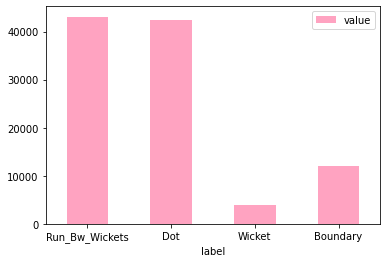

In [ ]:
labels= train_df.Target.unique()
wickets = train_df['Target'][train_df['Target'] == "Wicket"].count()
dots = train_df['Target'][train_df['Target'] == "Dot"].count()
boundary=train_df['Target'][train_df['Target'] == "Boundary"].count()
runs = train_df['Target'][train_df['Target'] == "Run_Bw_Wickets"].count()
df = pd.DataFrame({'label':labels, 'value':[runs, dots, wickets, boundary]})
ax = df.plot.bar(x='label', y='value',rot=0,color=(1, 0.4, 0.6, 0.6))

**Data Preparation**

In [ ]:
#helper function to clean and lammatize the text
stop_words=stopwords.words('english')
wn=WordNetLemmatizer()
def cleanup_text_column(text):
    text="".join([word for word in text if word not in string.punctuation])
    token=re.split('\W+',text)
    text=[word for word in token if word not in stop_words and word not in ('','999')]
    text1=[wn.lemmatize(word) for word in text]
    return text1

In [ ]:
# Apply the defined helper functions on train data
train_df['filtered']=train_df['Commentary'].apply(lambda x:cleanup_text_column(x.lower()))
print(train_df.head())
#Apply the defined helper function on test data
test_df['filtered']=test_df['Commentary'].apply(lambda x:cleanup_text_column(x.lower()))
print(test_df.head())

   ID  ...                                           filtered
0   0  ...  [india, reach, 300, 300, every, first, inning,...
1   1  ...  [slower, ball, ashwin, bunt, leg, walking, rea...
2   2  ...              [full, toss, slogs, get, thick, edge]
3   3  ...  [thats, closest, youll, get, hattrick, without...
4   4  ...  [sohail, sajda, bowling, rahane, slower, ball,...

[5 rows x 7 columns]
   ID  ...                                           filtered
0   0  ...  [yorker, gone, wrong, low, full, toss, dhoni, ...
1   1  ...                 [short, length, room, worked, leg]
2   2  ...  [good, yorker, dhoni, making, room, cant, get,...
3   3  ...  [raina, gone, finally, short, ball, scored, 74...
4   4  ...  [called, wide, great, call, say, moved, inside...

[5 rows x 6 columns]


In [ ]:
k=train_df.Target.unique()
m=sklearn.utils.class_weight.compute_class_weight(class_weight='balanced',classes=k,y=train_df['Target'])
print(m)
print(k)
d = {}
for i in range(4):
  d[k[i]] = m[i]
d 

[0.5897296  0.59753775 6.52671462 2.09399209]
['Run_Bw_Wickets' 'Dot' 'Wicket' 'Boundary']


{'Boundary': 2.093992088346794,
 'Dot': 0.5975377451672076,
 'Run_Bw_Wickets': 0.5897296042706278,
 'Wicket': 6.526714615977395}

In [ ]:
#vectorizing the train data
data_sample=train_df.copy()
count_sample1=CountVectorizer(analyzer=cleanup_text_column,max_features=100)
xcounts_sample= count_sample1.fit_transform(data_sample['Commentary'])
print(xcounts_sample.shape)
print(data_sample['Target'].value_counts())
#storing the features in a dataframe
xcountsdf=pd.DataFrame(xcounts_sample.toarray())
xcountsdf.columns=count_sample1.get_feature_names()
xcountsdf

#vectorizing the test data
test_sample=test_df.copy()
count_sample2=CountVectorizer(analyzer=cleanup_text_column,max_features=100)
ycounts_sample= count_sample2.fit_transform(test_sample['Commentary'])
print(ycounts_sample.shape)

#storing the features in a dataframe
ycountsdf=pd.DataFrame(ycounts_sample.toarray())
ycountsdf.columns=count_sample2.get_feature_names()
ycountsdf


(101634, 100)
Run_Bw_Wickets    43085
Dot               42522
Boundary          12134
Wicket             3893
Name: Target, dtype: int64
(26143, 100)


,across,another,around,back,backward,ball,bat,batsman,behind,bit,bounce,boundary,bowler,cant,come,cover,crease,cut,deep,defended,defends,delivery,doesnt,drive,driven,edge,end,extra,fielder,fine,flick,foot,forward,front,full,fuller,get,go,good,ground,...,much,outside,pad,past,pitch,play,played,point,pull,push,pushed,quick,right,room,run,short,shot,side,slower,square,straight,stump,sweep,swing,take,thats,third,time,toss,tossed,towards,track,try,turn,way,well,wide,work,worked,yorker
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26139,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
26140,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
26141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#Calculating the length of each Commentary 
data_copy=data_sample.loc[:,'Commentary'].copy()
data_sample['comment_len']=data_copy.apply(lambda x:len(x)-x.count(" "))
print(data_sample.head())
test_copy=test_sample.loc[:,'Commentary'].copy()
test_sample['comment_len']=test_copy.apply(lambda x:len(x)-x.count(" "))
print(test_sample.head())

   ID  ...  comment_len
0   0  ...          118
1   1  ...           86
2   2  ...           47
3   3  ...          113
4   4  ...          163

[5 rows x 8 columns]
   ID  ...  comment_len
0   0  ...           90
1   1  ...           40
2   2  ...           54
3   3  ...          105
4   4  ...          128

[5 rows x 7 columns]


In [ ]:
data_sample['word_count']=data_sample['Commentary'].apply(lambda x:len(x.split()))
print(data_sample.head())
test_sample['word_count']=test_sample['Commentary'].apply(lambda x:len(x.split()))
print(test_sample.head())

   ID      Match_ID  ...  comment_len word_count
0   0  803965640511  ...          118         30
1   1  803965640511  ...           86         20
2   2  803965640511  ...           47         13
3   3  803965640511  ...          113         23
4   4  803965640511  ...          163         36

[5 rows x 9 columns]
   ID      Match_ID  ...  comment_len word_count
0   0  803965640511  ...           90         20
1   1  803965640511  ...           40         11
2   2  803965640511  ...           54         12
3   3  803965640511  ...          105         26
4   4  803965640511  ...          128         32

[5 rows x 8 columns]


In [ ]:
#Calulating percentage of punctuation in the commentary column
def count_punc(text):
    count=sum(1 for char in text if char in string.punctuation)
    return round(count/(len(text)-text.count(" ")),3)*100
data_sample['pun%']=data_sample['Commentary'].apply(lambda x:count_punc(x))
print(data_sample.head())
test_sample['pun%']=test_sample['Commentary'].apply(lambda x:count_punc(x))
print(test_sample.head())

   ID      Match_ID  Over  ... comment_len  word_count pun%
0   0  803965640511  49.6  ...         118          30  1.7
1   1  803965640511  49.5  ...          86          20  2.3
2   2  803965640511  49.4  ...          47          13  6.4
3   3  803965640511  49.3  ...         113          23  5.3
4   4  803965640511  49.2  ...         163          36  4.9

[5 rows x 10 columns]
   ID      Match_ID  Over  ... comment_len  word_count pun%
0   0  803965640511  47.6  ...          90          20  4.4
1   1  803965640511  47.5  ...          40          11  7.5
2   2  803965640511  47.4  ...          54          12  5.6
3   3  803965640511  47.3  ...         105          26  3.8
4   4  803965640511  47.2  ...         128          32  3.9

[5 rows x 9 columns]


**Features Extraction**

In [ ]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

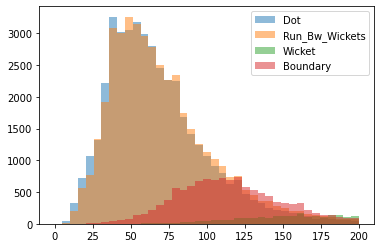

In [ ]:
#Visualizing the realtion between lengths through plots
bins=np.linspace(0,200,40)
pyplot.hist(data_sample[data_sample['Target']=="Dot"]['comment_len'],bins,alpha=0.5,label='Dot')
pyplot.hist(data_sample[data_sample['Target']=="Run_Bw_Wickets"]['comment_len'],bins,alpha=0.5,label='Run_Bw_Wickets')
pyplot.hist(data_sample[data_sample['Target']=="Wicket"]['comment_len'],bins,alpha=0.5,label='Wicket')
pyplot.hist(data_sample[data_sample['Target']=="Boundary"]['comment_len'],bins,alpha=0.5,label='Boundary')
pyplot.legend(loc='best')
pyplot.show()

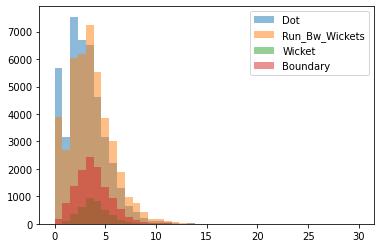

In [ ]:
#Visualizing the realtion between punctuation percentage through plots
bins=np.linspace(0,30,40)
pyplot.hist(data_sample[data_sample['Target']=="Dot"]['pun%'],bins,alpha=0.5,label='Dot')
pyplot.hist(data_sample[data_sample['Target']=="Run_Bw_Wickets"]['pun%'],bins,alpha=0.5,label='Run_Bw_Wickets')
pyplot.hist(data_sample[data_sample['Target']=="Wicket"]['pun%'],bins,alpha=0.5,label='Wicket')
pyplot.hist(data_sample[data_sample['Target']=="Boundary"]['pun%'],bins,alpha=0.5,label='Boundary')
pyplot.legend(loc='best')
pyplot.show()

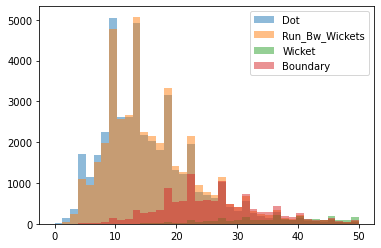

In [ ]:
#Visualizing the realtion between punctuation percentage through plots
bins=np.linspace(0,50,40)
pyplot.hist(data_sample[data_sample['Target']=="Dot"]['word_count'],bins,alpha=0.5,label='Dot')
pyplot.hist(data_sample[data_sample['Target']=="Run_Bw_Wickets"]['word_count'],bins,alpha=0.5,label='Run_Bw_Wickets')
pyplot.hist(data_sample[data_sample['Target']=="Wicket"]['word_count'],bins,alpha=0.5,label='Wicket')
pyplot.hist(data_sample[data_sample['Target']=="Boundary"]['word_count'],bins,alpha=0.5,label='Boundary')
pyplot.legend(loc='best')
pyplot.show()

In [ ]:
x_features=pd.concat([data_sample['comment_len'],data_sample['pun%'],data_sample['word_count'],pd.DataFrame(xcounts_sample.toarray())],axis=1)
print(x_features.head())
y_features=pd.concat([test_sample['comment_len'],test_sample['pun%'],test_sample['word_count'],pd.DataFrame(ycounts_sample.toarray())],axis=1)
print(y_features.head())

   comment_len  pun%  word_count  0  1  2  3  4  ...  92  93  94  95  96  97  98  99
0          118   1.7          30  0  0  0  0  1  ...   0   0   0   0   0   0   0   0
1           86   2.3          20  0  0  0  0  0  ...   0   0   0   0   0   0   0   0
2           47   6.4          13  0  0  0  0  0  ...   0   0   0   0   0   0   0   0
3          113   5.3          23  0  0  0  0  0  ...   0   0   0   0   0   0   0   1
4          163   4.9          36  0  0  1  0  0  ...   1   0   0   0   0   0   0   0

[5 rows x 103 columns]
   comment_len  pun%  word_count  0  1  2  3  4  ...  92  93  94  95  96  97  98  99
0           90   4.4          20  0  0  0  0  0  ...   0   0   0   0   0   0   0   1
1           40   7.5          11  0  0  0  0  0  ...   0   0   0   0   0   0   1   0
2           54   5.6          12  0  0  0  0  0  ...   0   0   0   0   0   0   0   1
3          105   3.8          26  0  0  0  0  0  ...   0   0   0   0   0   0   0   0
4          128   3.9          32  0  0  0

**Split Data**

In [ ]:
# Split your training data into Train and test

X_train, X_test, y_train, y_test = train_test_split(x_features,data_sample['Target'],test_size=0.2)

In [ ]:
#Considering the test data
X1_test=y_features
test_sample['Target']=""
y1_test=test_sample['Target']

**Choosing A Model**

In [ ]:
# Define your classifier model

classifier = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1,class_weight=d)
classifier_model=classifier.fit(X_train,y_train)
sorted(zip(classifier_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.17315228948430317, 'comment_len'),
 (0.1425694719770337, 'word_count'),
 (0.06565744517691188, 'pun%'),
 (0.030139510413102245, 0),
 (0.015494505988690965, 18),
 (0.014830942794501374, 6),
 (0.01420094396114213, 45),
 (0.013082145499864648, 84),
 (0.01289374771220043, 81),
 (0.011455322208047085, 75)]

In [ ]:
# Generate Predictions

predictions_on_train_data = classifier_model.predict(X_test)
print(predictions_on_train_data)
precision,recall,fscore,support=score(y_test,predictions_on_train_data,labels=['Dot','Wicket','Run_Bw_Wickets','Boundary'],average='weighted')
print('precision:',round(precision,3))
print('recall:',round(recall,3))
print('fscore',round(fscore,3))
print('accuracy:',round((predictions_on_train_data==y_test).sum()/len(predictions_on_train_data),3))


['Dot' 'Run_Bw_Wickets' 'Run_Bw_Wickets' ... 'Run_Bw_Wickets'
 'Run_Bw_Wickets' 'Run_Bw_Wickets']
precision: 0.71
recall: 0.711
fscore 0.71
accuracy: 0.711


**Output Prediction**

In [ ]:
# Make predictions on the test data
predictions_on_test_data1 = classifier_model.predict(X1_test)
#print(type(predictions_on_test_data1))
print(predictions_on_test_data1)
(unique, counts) = np.unique(predictions_on_test_data1, return_counts=True)
frequencies = np.asarray((unique, counts))
print(frequencies)

['Boundary' 'Run_Bw_Wickets' 'Dot' ... 'Run_Bw_Wickets' 'Run_Bw_Wickets'
 'Run_Bw_Wickets']
[['Boundary' 'Dot' 'Run_Bw_Wickets' 'Wicket']
 [2962 11083 11111 987]]


In [ ]:
#Preparing Submission File
submission_DF = pd.DataFrame({'ID': test_df["ID"], 'Target': predictions_on_test_data1})

# Write the submission data frame to a file
write_output=pd.ExcelWriter('final_output.xlsx')
submission_DF.to_excel(write_output,index=False)
write_output.save()